In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles, make_moons, make_blobs, make_classification
from matplotlib.colors import ListedColormap

In [2]:
# 创建数据集

n_samples = 100

datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),
    make_classification(n_samples=n_samples, n_features=2, n_informative=2
                        , n_redundant=0, random_state=5)
]

Kernel = ["linear", "poly", "rbf", "sigmoid"]

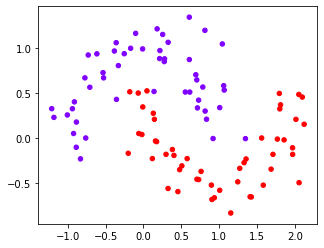

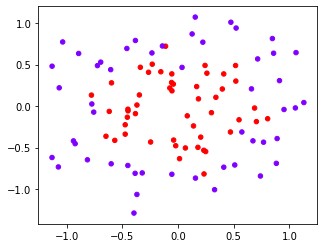

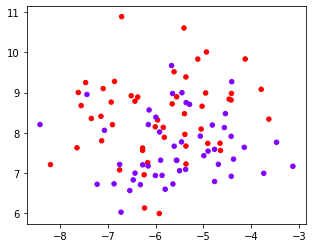

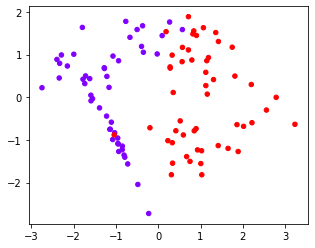

In [3]:
# 数据集可视化
for X, Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:, 0], X[:, 1], c=Y, s = 20, cmap="rainbow")

/home/gavin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: UserWarning: No contour levels were found within the data range.


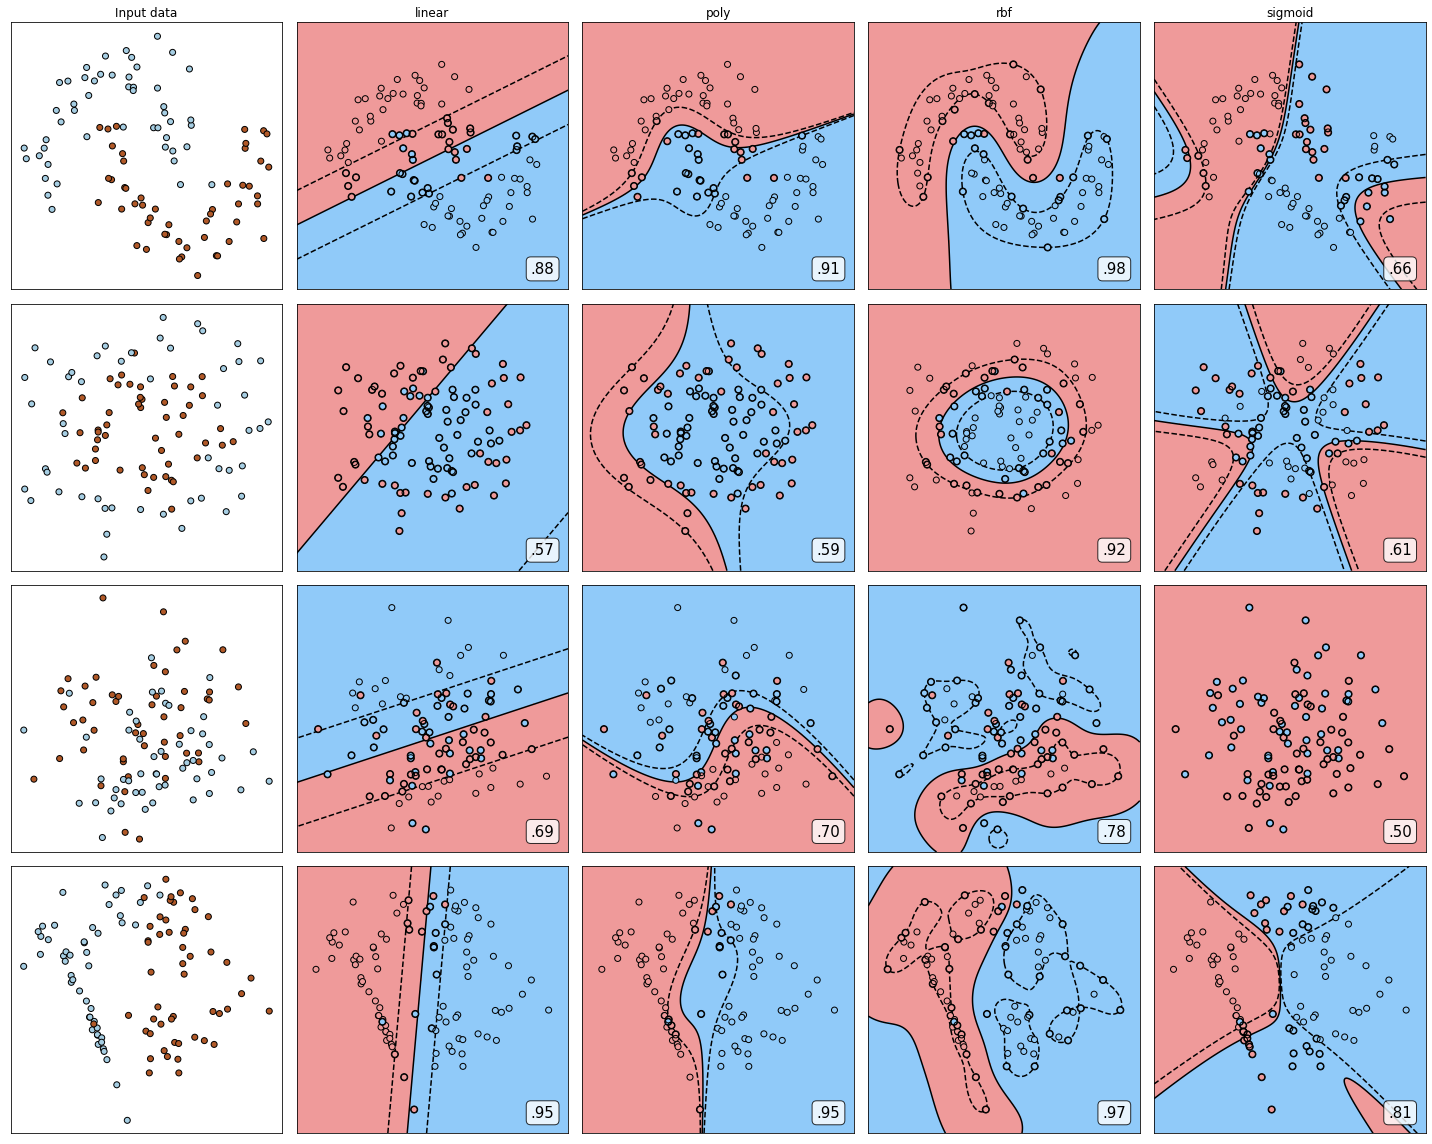

In [7]:
# 构建一个4*5的子图
nrows = len(datasets)
ncols = len(Kernel)+1
kernal = ["linear", "poly", "rbf", "sigmoid"]
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 16))

for ds_cnt, (X, Y) in enumerate(datasets):
    
    # 顺次取出图像的第一列
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    
    # 第一列绘制原始图像
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors="k")
    ax.set_xticks([])
    ax.set_yticks([])
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    # 绘制每一行中数据的在不同的核方法下的额分类情况
    
    for est_idx, kernel in enumerate(Kernel):
        
        # 目标图的位置
        ax = axes[ds_cnt, est_idx + 1]
        
        # 实例化模型
        clf = SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)
        
        # 绘制图像本省的散点图
        ax.scatter(X[:, 0], X[:, 1], c=Y, zorder= 10, cmap=custom_cmap, edgecolors="k")
        
        # 绘制支持向量
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1]
                   , s=50
                   , facecolor="none"
                   , zorder=10
                   , edgecolors="k")
        
        
#         # 方法一
#         xlim = ax.get_xlim()
#         ylim = ax.get_ylim()
#         axisx = np.linspace(xlim[0]-0.5, xlim[1]+0.5, 200)
#         axisy = np.linspace(ylim[0]-0.5, ylim[1]+0.5, 200)
#         axisx, axisy = np.meshgrid(axisx, axisy)
#         P = np.vstack([axisx.ravel(), axisy.ravel()]).T
#         Z = clf.decision_function(P).reshape(axisx.shape)


        # 方法二
        # 绘制决策边界
        x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max() + 0.5
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        
        #得到等高线
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        
        #不同分类情况绘制不同的颜色
        
        ax.pcolormesh(XX, YY, Z>0, cmap=custom_cmap)
        #plt.cm.Paired
        # 绘制等高线
        ax.contour(XX, YY, Z
                   , colors=["k", "k", "k"]
                   , linestyles = ["--", "-", "--"]
                   , levels = [-1, 0, 1])
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        if ds_cnt == 0:
            ax.set_title(kernel)
        
        ax.text(0.95, 0.06, ("%0.2f"%score).lstrip("0")
                , size=15, bbox = dict(boxstyle="round"
                                       , alpha=0.8
                                       , facecolor="white")
                ,transform=ax.transAxes
                , horizontalalignment="right")
plt.tight_layout()
plt.savefig("./imgs/核函数的好处.png")
plt.show()